In sigmoid the values will be in the range of (0,1). 

Do the exploratory Data Analysis.

Best way tdo the EDA is visualization.

Download the titanic dataset.

Graphs in the program.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

we can do this in seaborn as sns.countplot(gender)

sns.countplot(data = df, heu = 'Sex', df.Survived)



In [8]:
df.Survived.groupby([df.Survived, df.Sex]).count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

Text(0.5,1,'Survived count')

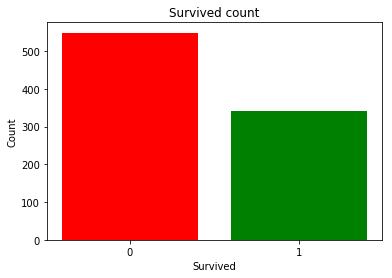

In [9]:
plt.bar(df.Survived.unique(), df.Survived.value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title("Survived count")

In [10]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.Survived.groupby([df.Survived, df.Embarked]).count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

In [14]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
    else:
        return age

In [16]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_age, axis = 1)

In [17]:
df.Age.mean()

29.265061728395061

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
new_df = df.copy()

In [20]:
new_df = new_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [21]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
new_df.dropna(axis = 0, inplace=True)

In [23]:
X = new_df.iloc[:, 1:]

In [24]:
y = new_df['Survived']

In [25]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Pclass', 'SibSp'], drop_first=True)

In [27]:
X.head()

,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,22.0,0,7.2500,1,0,1,0,1,1,0,0,0,0,0
1,38.0,0,71.2833,0,0,0,0,0,1,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0
3,35.0,0,53.1000,0,0,1,0,0,1,0,0,0,0,0
4,35.0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [31]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
#sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)
print confusion_matrix(y_test, y_pred)

('Training Accuracy :', 0.86779184247538677)
('Testing Accuracy :', 0.7471910112359551)
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       105
           1       0.75      0.58      0.65        73

   micro avg       0.75      0.75      0.75       178
   macro avg       0.75      0.72      0.73       178
weighted avg       0.75      0.75      0.74       178

[[91 14]
 [31 42]]


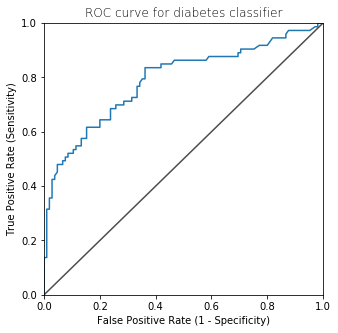

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [34]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

('AUC Score :', 0.7897586431833008)


In [187]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
f1_score(y_pred, y_test)

0.64122137404580148

In [188]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
f1_score(y_pred, y_test)

/home/bmkumar/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.67164179104477617

In [171]:
x_test = pd.read_csv("test.csv")

In [172]:
x_test.shape

(418, 11)

In [173]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [174]:
x_test = x_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [175]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [176]:
x_test['Age'] = x_test[['Age', 'Pclass']].apply(fill_age, axis = 1)

In [177]:
x_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [178]:
x_test = x_test.drop(['Cabin'], axis = 1)

In [179]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [180]:
x_test = pd.get_dummies(x_test, columns=['Sex', 'Embarked', 'Pclass', 'SibSp'], drop_first=True)

In [181]:
x_test.isnull().sum()

Age           0
Parch         0
Fare          1
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
dtype: int64

In [182]:
x_test.dropna(axis=0, inplace=True)

In [183]:
y_pred = model.predict(x_test)

In [184]:
from sklearn.metrics import f1_score

In [35]:
x_train.shape

(711, 14)

In [36]:
x_test.shape

(178, 14)

In [37]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def stratified(model, x, y, test):
    flods = StrafifiedKFold(n_folds = 10, shuffle = True, )